Translating Susan's grid into NEMO parameters

Can we use the same number of vertical points, give up some resolution from 15 - 25 m to increase our resolution below to 250 m?  Our current resolution:

          level  gdept_1d  gdepw_1d  e3t_1d   e3w_1d  
             1     0.50     0.00     1.00     1.00
             2     1.50     1.00     1.00     1.00
             3     2.50     2.00     1.00     1.00
             4     3.50     3.00     1.00     1.00
             5     4.50     4.00     1.00     1.00
             6     5.50     5.00     1.00     1.00
             7     6.50     6.00     1.00     1.00
             8     7.50     7.00     1.00     1.00
             9     8.50     8.00     1.00     1.00
            10     9.50     9.00     1.00     1.00
            11    10.50    10.00     1.00     1.00
            12    11.51    11.01     1.01     1.00
            13    12.52    12.01     1.01     1.01
            14    13.54    13.03     1.02     1.02
            15    14.57    14.05     1.05     1.03
            16    15.63    15.10     1.09     1.06
            17    16.76    16.19     1.17     1.12
            18    18.01    17.36     1.34     1.24
            19    19.48    18.71     1.65     1.47
            20    21.39    20.36     2.23     1.89
            21    24.10    22.61     3.29     2.68
            22    28.23    25.94     5.12     4.09
            23    34.69    31.10     7.97     6.41
            24    44.52    39.12    11.83     9.80
            25    58.48    50.96    16.11    13.97
            26    76.59    67.05    19.96    18.14
            27    98.06    86.97    22.81    21.52
            28   121.87   109.74    24.64    23.84
            29   147.09   134.35    25.70    25.25
            30   173.11   160.03    26.29    26.04
            31   199.57   186.31    26.60    26.47
            32   226.26   212.90    26.76    26.69
            33   253.07   239.65    26.84    26.81
            34   279.93   266.50    26.89    26.87
            35   306.83   293.38    26.91    26.90
            36   333.75   320.29    26.92    26.92
            37   360.67   347.21    26.93    26.92
            38   387.60   374.14    26.93    26.93
            39   414.53   401.07    26.93    26.93
            40   441.47   428.00    26.93    26.93


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Original Grid Spacing
depth_orig = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.01, 12.01, 13.03, 14.05, 15.1,
    16.19, 17.36, 18.71, 20.36, 22.61, 25.94, 31.1, 39.12, 50.96, 67.05, 86.97, 109.74,
    134.35, 160.03, 186.31, 212.9, 239.65, 266.5, 293.38, 320.29, 347.21, 374.14,
    401.07, 428])
delta_depth_orig = np.zeros([39]); central_depth_orig = np.zeros([39])
delta_depth_orig = depth_orig[1:40] - depth_orig[0:39]
central_depth_orig = depth_orig[0:39] + delta_depth_orig/2.

In [3]:
def NEMO_tanh(ks, a, kth, acr):
    """A generic tanh used in NEMO"""
    return a* np.tanh((ks-kth)/acr)

def NEMO_tanh_integral(ks, a, kth, acr):
    """A generic integrated tanh used in NEMO grid"""
    return a*acr*np.log(np.cosh((ks-kth)/acr))

In [4]:
# Proposed Grid Spacing
# Top grid point, corrected for tails of tanh functions
a = 1-0.02068635-0.00153595-0.00000149177
# first tanh function (change across tanh, width, position)
b = 3; c = 6; d = 16.7 - 1.
# second tanh function
e = 13; f = 5.5; g = 22 - 1.
# third tanh function
h = 16; i = 5; j = 33.877- 1.
p = np.arange(39)
delta_depth_new = a + b/2.*(1+np.tanh((p-d)/c)) + e/2.*(1+np.tanh((p-g)/f)) + h/2.*(1+np.tanh((p-j)/i))
depth_new = np.zeros([40]); central_depth_new = np.zeros([30])
depth_new[0] = 0.
for ip in p:
    depth_new[ip+1] = depth_new[ip] + delta_depth_new[ip]
central_depth_new = depth_new[0:39] + delta_depth_new/2.
print 'Surface cell Size = ',depth_new[1], 'Bottom Depth = ',depth_new[-1]

Surface cell Size =  0.999999999996 Bottom Depth =  428.000577161


Proposed grid spacing
$$ z(k) = ppsur + ppa0k + ppa1 ppacr \log(\cosh(\frac{k-ppkth}{ppacr})) + ppa2 ppacr2 \log\cosh(\frac{k-ppkth2} {ppacr2})) + ppa3 ppacr3 \log\cosh(\frac{k-ppkth3} {ppacr3})) $$ 

$$ e3(k) =  ppa0 + ppa1 \tanh(\frac{k-ppkth}{ppacr}) + ppa2\tanh(\frac{k-ppkth2}{ppacr2}) + ppa3\tanh(\frac{k-ppkth3}{ppacr3})$$

Also need e3(1) = 1, z(1) = 0

In [5]:
ks = np.arange(1,41)

#translated from above
ppa1 = 3/2.; ppkth = 16.7; ppacr = 6.;  
ppa2 = 13/2.; ppkth2 = 22.; ppacr2 = 5.5;
ppa3 = 16/2.; ppkth3 = 33.877; ppacr3 = 5.;

#setting e3(1) = 1
ppa0 = 1 - (NEMO_tanh(ks[0], ppa1, ppkth, ppacr) + NEMO_tanh(ks[0], ppa2, ppkth2, ppacr2) +
            NEMO_tanh(ks[0], ppa3, ppkth3, ppacr3) )
#setting z(1) = 0
ppsur = -(NEMO_tanh_integral(ks[0], ppa1, ppkth, ppacr) + NEMO_tanh_integral(ks[0], ppa2, ppkth2, ppacr2) +
          (NEMO_tanh_integral(ks[0], ppa3, ppkth3, ppacr3) + ppa0*ks[0]))

print 'ppa0', ppa0
print 'ppsur', ppsur

dz = ppa0 + NEMO_tanh(ks, ppa1, ppkth, ppacr) + NEMO_tanh(ks, ppa2, ppkth2, ppacr2) + NEMO_tanh(ks, ppa3, ppkth3, ppacr3) 
z = ppsur + ppa0*ks + (NEMO_tanh_integral(ks, ppa1, ppkth, ppacr) + NEMO_tanh_integral(ks, ppa2, ppkth2, ppacr2) +
          NEMO_tanh_integral(ks, ppa3, ppkth3, ppacr3))

print z[0], z[-1]
print dz[0], dz[-1]

ppa0 16.9777762082
ppsur -381.364772219
0.0 443.304590924
1.0 31.6859033266


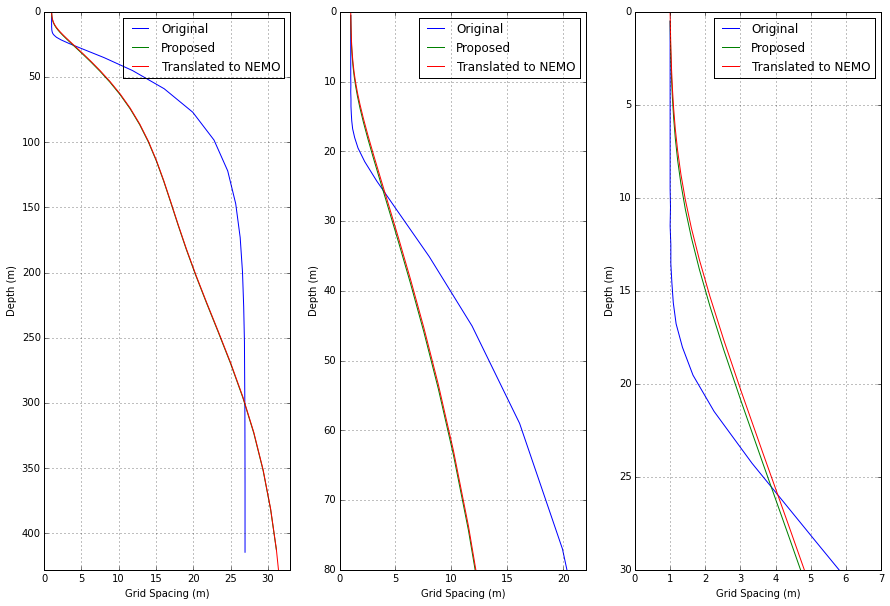

In [6]:
fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].set_ylim(top = depth_orig[0], bottom = depth_orig[-1])
axs[0].set_xlim(right = 33)
axs[1].set_ylim(top = depth_orig[0], bottom = 80.)
axs[1].set_xlim(right = 22)
axs[2].set_ylim(top = depth_orig[0], bottom = 30.)
axs[2].set_xlim(right = 7)
for ax in axs:
    ax.plot(delta_depth_orig, central_depth_orig, label="Original")
    ax.plot(delta_depth_new, central_depth_new, label="Proposed")
    ax.plot(dz,z, label = 'Translated to NEMO')
    ax.set_xlabel('Grid Spacing (m)')
    ax.set_ylabel('Depth (m)')
    ax.legend(); ax.grid()